# ==================== Logistic Regression =================================

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
from numpy import exp

# Plotting library
import matplotlib.pyplot as plt

# tells matplotlib to embed plots within the notebook
%matplotlib inline

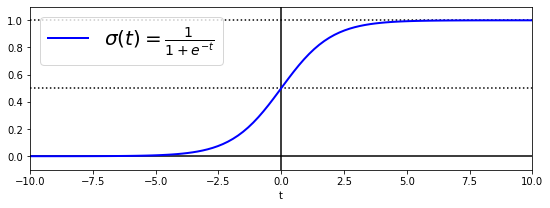

In [2]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [3]:
# Load data
# The first two columns contains the exam scores and the third column
# contains the label.
data = np.loadtxt(os.path.join('Data', 'ex2data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

In [5]:
print(iris["data"][:1]) # petal dimension - sepal length, sepal width, petal length, petal width
print(iris["target"][:1]) # - Iris-Setosa == 0 - Iris-Versicolour == 1- Iris-Virginica == 2

[[5.1 3.5 1.4 0.2]]
[0]


In [6]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [7]:
def plotData(X, y):
    fig = plt.figure()
    plt.plot(X,y, '^k', lw=2, ms=10)
    plt.xlabel("Petal width")
    plt.ylabel("Iris-Viginica")

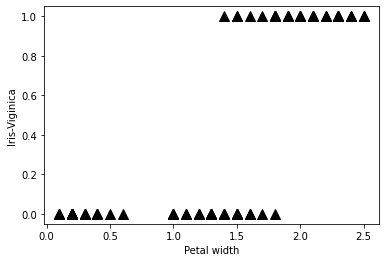

In [8]:
plotData(X,y)

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42, solver='liblinear')

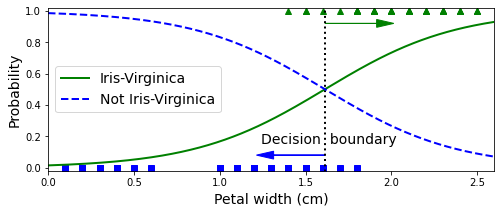

In [10]:
X_new = np.linspace(0, 2.6, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 2.6, -0.02, 1.02])
plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid( # create a mesh for all data points following
        np.linspace(2.9, 7, 500).reshape(-1, 1), # pedal length
        np.linspace(0.8, 2.7, 200).reshape(-1, 1), # pedal width
    ) 

X_new = np.c_[x0.ravel(), x1.ravel()] # flatten the mesh to create 2 column new data set
y_proba = log_reg.predict_proba(X_new) # create prediction for all data points

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs") # plot the blue square when not iris-virginica
plt.plot(X[y==1, 0], X[y==1, 1], "g^") # plot the green triangle when iris-virginica

zz = y_proba[:, 1].reshape(x1.shape) # reshape to 2D 
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg) # create

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)


plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

TypeError: Input z must be 2D, not 1D